In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os 

In [2]:
sys.path.insert(0,'../scripts/Images_generation/')
from images_generator import image_generator_sim, image_generator_real
from images_utils import get_data, shift_gal, peak_detection, draw_images
import cosmos_params

sys.path.insert(0,'../scripts/tools_generation/')
from tools_generation import utils, plot

***
**Note:**

Images simulated in this notebook are drawn supposing a number of exposures corresponding to the **full LSST and Euclid surveys**. There is just one PSF applied on the stack.

If you want to generate images for one single exposure, go to the file `cosmos_param.py` and change the `full_or_single` parameter to `'single'`.

***

# Image generation using parametric models (i.e. simulations)

## Generate image of isolated galaxies with brightest centered

In [3]:
case = 'centered' # centered/ miscentered_0.1/ miscentered_peak/ 
gal_type = 'simulation' #simulation or real/
training_or_test = 'test' # training test validation
isolated_or_blended = 'isolated' #isolated blended
method_shift = 'noshift' # noshift uniform uniform+betaprime
do_peak_detection = False
N_files = 1 # Nb of files to generate
N_per_file = 1 # Number of galaxies per file
nmax_blend = 1 # Number of galaxies on an image if integer, or interval for sampling if tuple
assert training_or_test in ['training', 'validation', 'test']

# Fixed parameters:
max_try = 100 # maximum number of try before leaving the function (to avoir infinite loop)
mag_cut = 27.5 # magnitude cut
max_stamp_size = 64 # Size of patch to generate
center_brightest = True # Center the brightest galaxy (i.e. the galaxy with the highest magnitude)
# If center_brightest = False : choose with method to use to shift the brightest
method_shift_brightest = 'uniform'
# And then you need to choose the method to shift the other galaxies as a function of the position of the brightest on the image
method_shift_others = 'uniform'
max_dx = 3.2 #in arcseconds, limit to use for uniform shifting: the center of the shifted galaxy will be shifted from the center or from the brightest galaxy from a random number between [-max_dx ; max_dx] arcsecond
max_r = 2. #in arcseconds, limit to use for annulus shifting: galaxy is shifted in an annulus around the center of the image or of the brightest galaxy which has for minimum radius fwhm_lsst/2 and for maximum radius max_r


In [4]:
# Index to use
used_idx = np.arange(5000)
# Catalog path
cosmos_cat_dir = '/sps/lsst/users/barcelin/COSMOS_25.2_training_sample'

In [5]:
res = image_generator_sim(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest, max_stamp_size)

In [6]:
res[2]

{'redshift_0': 1.0312000513076782,
 'moment_sigma_0': 2.2693612575531006,
 'e1_0': 0.35222622752189636,
 'e2_0': 0.06996265798807144,
 'mag_0': 26.75446380093306,
 'nb_blended_gal': 1,
 'mag': 26.75446380093306,
 'mag_ir': -1.3064681787398387,
 'closest_mag': nan,
 'closest_mag_ir': nan,
 'closest_x': nan,
 'closest_y': nan,
 'idx_closest_to_peak': 0,
 'n_peak_detected': 1,
 'SNR': 39.19423628073339,
 'SNR_peak': 0.03725587237970835}

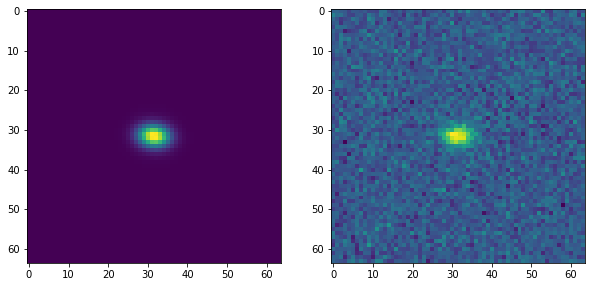

In [7]:
fig, ax = plt.subplots(1,2, figsize =(10,5))
ax[0].imshow(res[0][6])
ax[1].imshow(res[1][6])

## Generate image of blended galaxies without brightest centered

In [8]:
case = 'centered' # centered/ miscentered_0.1/ miscentered_peak/ 
gal_type = 'simulation' #simulation or real/
training_or_test = 'test' # training test validation
isolated_or_blended = 'blended' #isolated blended
method_shift = 'uniform' # noshift uniform uniform+betaprime
do_peak_detection = False
N_files = 1 # Nb of files to generate
N_per_file = 1 # Number of galaxies per file
nmax_blend = 6 # Number of galaxies on an image if integer, or interval for sampling if tuple
assert training_or_test in ['training', 'validation', 'test']

# Fixed parameters:
max_try = 100 # maximum number of try before leaving the function (to avoir infinite loop)
mag_cut = 27.5 # magnitude cut
max_stamp_size = 64 # Size of patch to generate
center_brightest = True # Center the brightest galaxy (i.e. the galaxy with the highest magnitude)
# If center_brightest = False : choose with method to use to shift the brightest
method_shift_brightest = 'uniform'
# And then you need to choose the method to shift the other galaxies as a function of the position of the brightest on the image
method_shift_others = 'uniform'
max_dx = 3.2 #in arcseconds, limit to use for uniform shifting: the center of the shifted galaxy will be shifted from the center or from the brightest galaxy from a random number between [-max_dx ; max_dx] arcsecond
max_r = 2. #in arcseconds, limit to use for annulus shifting: galaxy is shifted in an annulus around the center of the image or of the brightest galaxy which has for minimum radius fwhm_lsst/2 and for maximum radius max_r


In [9]:
# Index to use
used_idx = np.arange(5000)
# Catalog path
cosmos_cat_dir = '/sps/lsst/users/barcelin/COSMOS_25.2_training_sample'

In [10]:
res = image_generator_sim(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest)

In [11]:
res[2]

{'redshift_0': 0.8510000109672546,
 'moment_sigma_0': 2.1043810844421387,
 'e1_0': 0.08896102011203766,
 'e2_0': -0.011590670794248581,
 'mag_0': 26.274122808849818,
 'redshift_1': 1.0937999486923218,
 'moment_sigma_1': 2.1062891483306885,
 'e1_1': 0.1660073697566986,
 'e2_1': -0.046838998794555664,
 'mag_1': 26.756261831775156,
 'redshift_2': 0.4772999882698059,
 'moment_sigma_2': 1.9277873039245605,
 'e1_2': 0.08142348378896713,
 'e2_2': 0.2520121932029724,
 'mag_2': 25.535371923901568,
 'redshift_3': 1.9194999933242798,
 'moment_sigma_3': 1.5669825077056885,
 'e1_3': 0.20255465805530548,
 'e2_3': -0.2619790732860565,
 'mag_3': 27.391395216411865,
 'redshift_4': 0.2199999988079071,
 'moment_sigma_4': 2.167032480239868,
 'e1_4': -0.035982489585876465,
 'e2_4': 0.02392391674220562,
 'mag_4': 23.11215720333648,
 'redshift_5': 0.5164999961853027,
 'moment_sigma_5': 5.138465881347656,
 'e1_5': 0.029640302062034607,
 'e2_5': -0.16972121596336365,
 'mag_5': 22.129543784412377,
 'nb_blended_

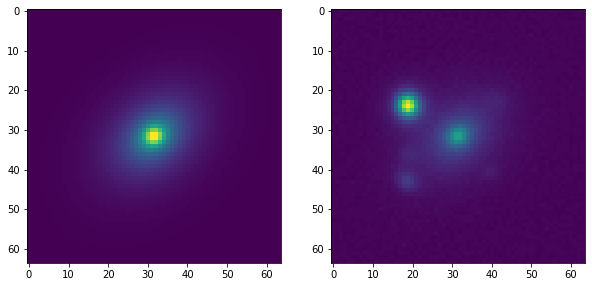

In [12]:
fig, ax = plt.subplots(1,2, figsize =(10,5))
ax[0].imshow(res[0][6])
ax[1].imshow(res[1][6])

Now if I want an image with a variable number of galaxies, say between 2 and 5, I need to set the `nmax_blend` parameter to (2,5).

In [13]:
nmax_blend = (2,5) # Give an interval to sample the number of galaxies to add in this interval

In [14]:
res = image_generator_sim(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest)

In [15]:
res[2]

{'redshift_0': 1.5271999835968018,
 'moment_sigma_0': 1.7211400270462036,
 'e1_0': 0.03193295747041702,
 'e2_0': -0.022362006828188896,
 'mag_0': 27.075263022058245,
 'redshift_1': 0.14890000224113464,
 'moment_sigma_1': 2.4647059440612793,
 'e1_1': 0.01943090185523033,
 'e2_1': 0.09506207704544067,
 'mag_1': 26.40003980425882,
 'redshift_2': 0.22110000252723694,
 'moment_sigma_2': 2.843658924102783,
 'e1_2': 0.005307936109602451,
 'e2_2': 0.016973761841654778,
 'mag_2': 20.037093783632194,
 'redshift_3': 3.6393001079559326,
 'moment_sigma_3': 1.696763038635254,
 'e1_3': -0.23517979681491852,
 'e2_3': 0.3410278558731079,
 'mag_3': 26.81041282023748,
 'redshift_4': 10.0,
 'moment_sigma_4': 10.0,
 'e1_4': 10.0,
 'e2_4': 10.0,
 'mag_4': 10.0,
 'nb_blended_gal': 4,
 'mag': 20.037093783632194,
 'mag_ir': -7.306113713880594,
 'closest_mag': 26.40003980425882,
 'closest_mag_ir': -0.31443945602060364,
 'closest_x': 1.4732353077529892,
 'closest_y': 1.9605368845497164,
 'idx_closest_to_peak': 0

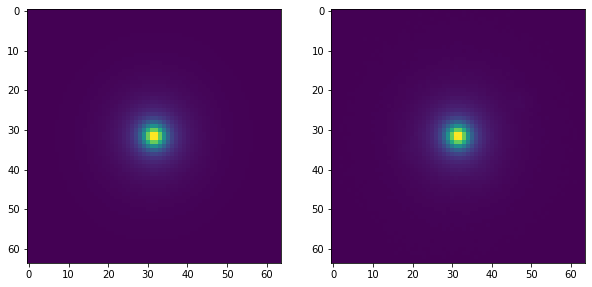

In [16]:
fig, ax = plt.subplots(1,2, figsize =(10,5))
ax[0].imshow(res[0][6])
ax[1].imshow(res[1][6])

# Image generation using real galaxy images (brightest not centered)

A small correlated noise is observed on these 'denoised' real images. 
A procedure exists in GalSim to whiten the noise but is still not functionning yet. An issue is opened about this: https://github.com/GalSim-developers/GalSim/issues/1071


Important: If the parameter `center_brightest` is set to `False`, the brightest galaxy is not centered any more but also the first parameters at rank 0 in the data do not refer to the brightest galaxy any more. It is the case when `center_brightest` is set to `True`.

## Generate image of isolated galaxies

In [17]:
case = 'centered' # centered/ miscentered_0.1/ miscentered_peak/ 
gal_type = 'real' #simulation or real/
training_or_test = 'test' # training test validation
isolated_or_blended = 'isolated' #isolated blended
method_shift = 'noshift' # noshift uniform uniform+betaprime
do_peak_detection = False
N_files = 1 # Nb of files to generate
N_per_file = 1 # Number of galaxies per file
nmax_blend = 1 # Number of galaxies on an image if integer, or interval for sampling if tuple
assert training_or_test in ['training', 'validation', 'test']

# Fixed parameters:
max_try = 100 # maximum number of try before leaving the function (to avoir infinite loop)
mag_cut = 26. # magnitude cut
max_stamp_size = 64 # Size of patch to generate
center_brightest = False # Center the brightest galaxy (i.e. the galaxy with the highest magnitude)
# If center_brightest = False : choose with method to use to shift the brightest
method_shift_brightest = 'uniform'
# And then you need to choose the method to shift the other galaxies as a function of the position of the brightest on the image
method_shift_others = 'uniform'
max_dx = 3.2 #in arcseconds, limit to use for uniform shifting: the center of the shifted galaxy will be shifted from the center or from the brightest galaxy from a random number between [-max_dx ; max_dx] arcsecond
max_r = 2. #in arcseconds, limit to use for annulus shifting: galaxy is shifted in an annulus around the center of the image or of the brightest galaxy which has for minimum radius fwhm_lsst/2 and for maximum radius max_r

In [18]:
# Index to use
used_idx = np.arange(5000)
# Catalog path
cosmos_cat_dir = '/sps/lsst/users/barcelin/COSMOS_25.2_training_sample'

In [19]:
res = image_generator_real(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest, max_stamp_size)

In [20]:
res[2]

{'mag_0': 24.628706647517273,
 'redshift_0': 0.0,
 'moment_sigma_0': 3.3518552780151367,
 'e1_0': -0.027264565229415894,
 'e2_0': -0.4554724395275116,
 'nb_blended_gal': 1,
 'mag': 24.628706647517273,
 'mag_ir': -3.0287728045391002,
 'closest_mag': nan,
 'closest_mag_ir': nan,
 'closest_x': nan,
 'closest_y': nan,
 'idx_closest_to_peak': 0,
 'n_peak_detected': 1,
 'SNR': 166.5911268305328,
 'SNR_peak': 0.12615478944177888}

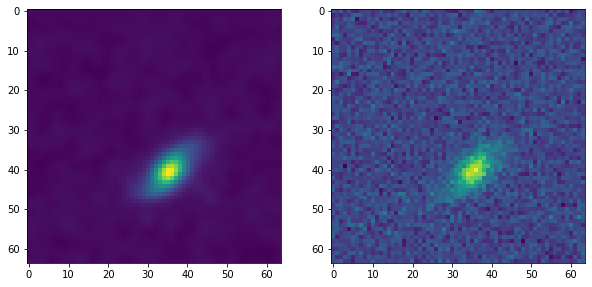

In [21]:
fig, ax = plt.subplots(1,2, figsize =(10,5))
ax[0].imshow(res[0][6])
ax[1].imshow(res[1][6])

## Generate image of blended galaxies

In [22]:
case = 'centered' # centered/ miscentered_0.1/ miscentered_peak/ 
gal_type = 'real' #simulation or real/
training_or_test = 'test' # training test validation
isolated_or_blended = 'blended' #isolated blended
method_shift = 'uniform' # noshift uniform uniform+betaprime
do_peak_detection = False
N_files = 1 # Nb of files to generate
N_per_file = 1 # Number of galaxies per file
nmax_blend = 6 # Number of galaxies on an image if integer, or interval for sampling if tuple
assert training_or_test in ['training', 'validation', 'test']

# Fixed parameters:
max_try = 100 # maximum number of try before leaving the function (to avoir infinite loop)
mag_cut = 26 # magnitude cut
max_stamp_size = 64 # Size of patch to generate
center_brightest = True # Center the brightest galaxy (i.e. the galaxy with the highest magnitude)
# If center_brightest = False : choose with method to use to shift the brightest
method_shift_brightest = 'uniform'
# And then you need to choose the method to shift the other galaxies as a function of the position of the brightest on the image
method_shift_others = 'annulus'
max_dx = 3.2 #in arcseconds, limit to use for uniform shifting: the center of the shifted galaxy will be shifted from the center or from the brightest galaxy from a random number between [-max_dx ; max_dx] arcsecond
max_r = 4. #in arcseconds, limit to use for annulus shifting: galaxy is shifted in an annulus around the center of the image or of the brightest galaxy which has for minimum radius fwhm_lsst/2 and for maximum radius max_r


In [23]:
# Index to use
used_idx = np.arange(5000)
# Catalog path
cosmos_cat_dir = '/sps/lsst/users/barcelin/COSMOS_25.2_training_sample'

In [24]:
res = image_generator_real(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest, max_stamp_size)

In [25]:
res[2]

{'mag_0': 25.58548412851879,
 'redshift_0': 0.0,
 'moment_sigma_0': 2.0227785110473633,
 'e1_0': -0.24216267466545105,
 'e2_0': 0.43472573161125183,
 'mag_1': 25.94647313939289,
 'redshift_1': 0.0,
 'moment_sigma_1': 1.9018101692199707,
 'e1_1': 0.06612970679998398,
 'e2_1': -0.028773043304681778,
 'mag_2': 23.41925603793564,
 'redshift_2': 0.0,
 'moment_sigma_2': 2.137824535369873,
 'e1_2': -0.032085344195365906,
 'e2_2': 0.08220478892326355,
 'mag_3': 25.909045806582657,
 'redshift_3': 0.0,
 'moment_sigma_3': 1.9826765060424805,
 'e1_3': -0.8173725605010986,
 'e2_3': 0.02874286100268364,
 'mag_4': 24.310185597982755,
 'redshift_4': 0.0,
 'moment_sigma_4': 1.9434525966644287,
 'e1_4': 0.09177608788013458,
 'e2_4': 0.05176853388547897,
 'mag_5': 23.00143618614308,
 'redshift_5': 0.0,
 'moment_sigma_5': 2.948146104812622,
 'e1_5': -0.08090373873710632,
 'e2_5': 0.03300376236438751,
 'nb_blended_gal': 6,
 'mag': 23.00143618614308,
 'mag_ir': -4.468297136730652,
 'closest_mag': 25.5854841

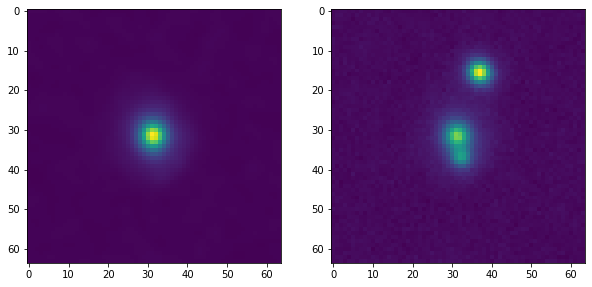

In [26]:
fig, ax = plt.subplots(1,2, figsize =(10,5))
ax[0].imshow(res[0][6])
ax[1].imshow(res[1][6])

# Image generation of field

 51.2 arcseconds of LSST (256x256 pixels, 256 x 0.2 = 51.2 - 0.2 arcsecond/pix is pixel size of LSST data), so shift in 51.2/2 = 25,6 arcseconds.
 
 On these field I add a random number between 32 and 96 galaxies so that, if we generate a lot of these, the mean is at 64 galaxies per patch (mean of galaxies density after 10 years of operation for LSST, https://arxiv.org/pdf/1911.02505.pdf, part 2.4 page 4)

In [43]:
case = 'centered' # centered/ miscentered_0.1/ miscentered_peak/ 
gal_type = 'simulation' #simulation or real/
training_or_test = 'test' # training test validation
isolated_or_blended = 'blended' #isolated blended
method_shift = 'uniform' # noshift uniform uniform+betaprime
do_peak_detection = False
N_files = 1 # Nb of files to generate
N_per_file = 1 # Number of galaxies per file
nmax_blend = (32,96) # Number of galaxies on an image if integer, or interval for sampling if tuple
assert training_or_test in ['training', 'validation', 'test']

# Fixed parameters:
max_try = 100 # maximum number of try before leaving the function (to avoir infinite loop)
mag_cut = 27.5 # magnitude cut
max_stamp_size = 256 # Size of patch to generate
center_brightest = False # Center the brightest galaxy (i.e. the galaxy with the highest magnitude)
# If center_brightest = False : choose with method to use to shift the brightest
method_shift_brightest = 'uniform'
# And then you need to choose the method to shift the other galaxies as a function of the position of the brightest on the image
method_shift_others = 'uniform'
max_dx = 25.6 #in arcseconds, limit to use for uniform shifting: the center of the shifted galaxy will be shifted from the center or from the brightest galaxy from a random number between [-max_dx ; max_dx] arcsecond
max_r = 4. #in arcseconds, limit to use for annulus shifting: galaxy is shifted in an annulus around the center of the image or of the brightest galaxy which has for minimum radius fwhm_lsst/2 and for maximum radius max_r

In [44]:
# Index to use
used_idx = np.arange(5000)
# Catalog path
cosmos_cat_dir = '/sps/lsst/users/barcelin/COSMOS_25.2_training_sample'

## With simulations

In [45]:
res = image_generator_sim(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest, max_stamp_size)

In [46]:
res[2]

{'redshift_0': 1.432800054550171,
 'moment_sigma_0': 2.7939133644104004,
 'e1_0': -0.4598221778869629,
 'e2_0': 0.15405505895614624,
 'mag_0': 26.987079858623815,
 'redshift_1': 1.1593999862670898,
 'moment_sigma_1': 2.0854103565216064,
 'e1_1': -0.5659160614013672,
 'e2_1': 0.5497440099716187,
 'mag_1': 26.95136320747976,
 'redshift_2': 1.9266999959945679,
 'moment_sigma_2': 2.0707895755767822,
 'e1_2': -0.6349776387214661,
 'e2_2': -0.5074647068977356,
 'mag_2': 27.474372805265684,
 'redshift_3': 0.07999999821186066,
 'moment_sigma_3': 2.4461283683776855,
 'e1_3': 0.07976759225130081,
 'e2_3': 0.21920672059059143,
 'mag_3': 23.48928317366972,
 'redshift_4': 0.6657999753952026,
 'moment_sigma_4': 2.160459041595459,
 'e1_4': -0.43824541568756104,
 'e2_4': 0.2923714220523834,
 'mag_4': 25.68903412699396,
 'redshift_5': 1.9757000207901,
 'moment_sigma_5': 1.7941185235977173,
 'e1_5': -0.46377110481262207,
 'e2_5': 0.26831555366516113,
 'mag_5': 26.883819657505256,
 'redshift_6': 1.276900

In [47]:
print(str(res[2]['nb_blended_gal'])+' galaxies are added to this image.')

60 galaxies are added to this image.


Here `res[0]` is not very interesting to plot. It is just the first galaxy which was generated, not necessarily the brightest one, as we set the parameter `center_brightest` to `False`.

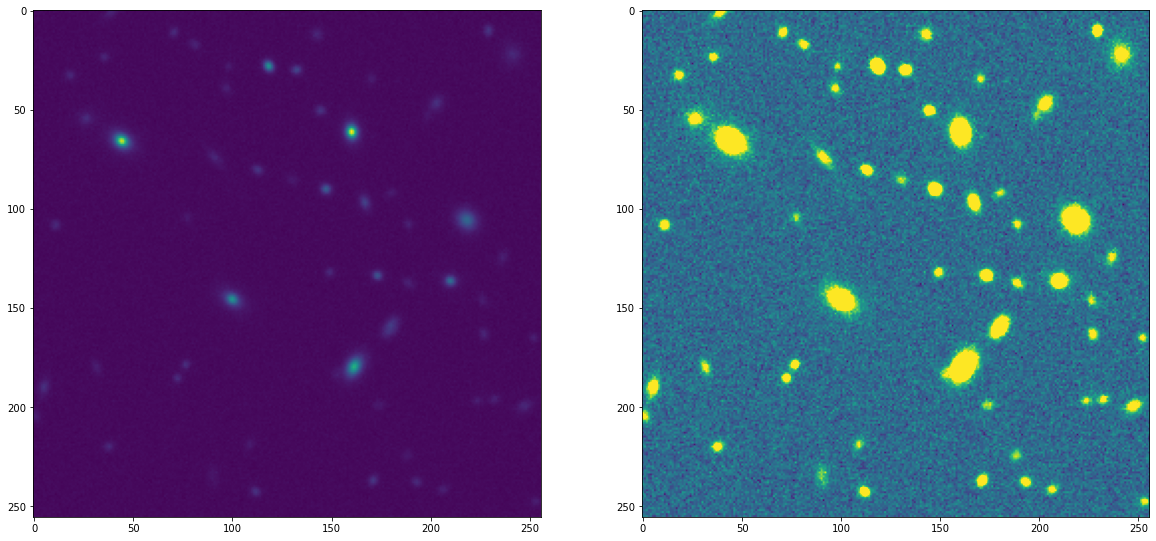

In [48]:
fig, ax = plt.subplots(1,2, figsize =(20,10))
ax[0].imshow(res[1][6])
ax[1].imshow(res[1][6], vmax = 2000)

Use the `plot_rgb` function of the `plot.py` module to show the image in RGB (IRG bands)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


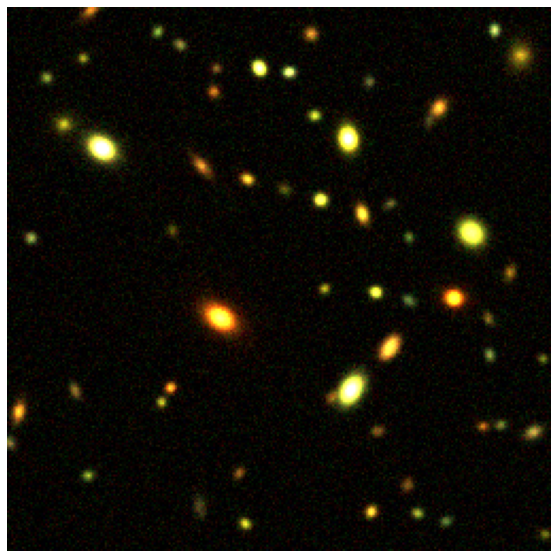

In [49]:
bands = [7,6,5] # Plot ugrizy

fig = plt.figure(figsize = (10,10))

plot.plot_rgb(res[1]/(np.max(res[1][4:])/10), bands = bands,ax= None, band_first = True,zoom = 1, clip = False)

Put a cross on the center of each galaxy with the shift information generated when the image is created.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


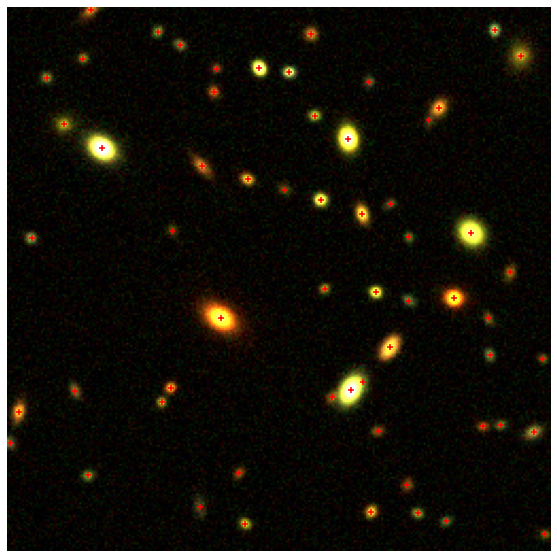

In [50]:
bands = [7,6,5] # Plot ugrizy
pixel_scale_lsst = 0.2 # arcsec/pix
fig = plt.figure(figsize = (10,10))

plot.plot_rgb(res[1]/(np.max(res[1][4:])/10), bands = bands,ax= None, band_first = True,zoom = 1, shifts = res[3]/pixel_scale_lsst, clip = False)

## With real images

In [35]:
case = 'centered' # centered/ miscentered_0.1/ miscentered_peak/ 
gal_type = 'real' #simulation or real/
training_or_test = 'test' # training test validation
isolated_or_blended = 'blended' #isolated blended
method_shift = 'uniform' # noshift uniform uniform+betaprime
do_peak_detection = False
N_files = 1 # Nb of files to generate
N_per_file = 1 # Number of galaxies per file
nmax_blend = (32,96) # Number of galaxies on an image if integer, or interval for sampling if tuple
assert training_or_test in ['training', 'validation', 'test']

# Fixed parameters:
max_try = 100 # maximum number of try before leaving the function (to avoir infinite loop)
mag_cut = 24. # magnitude cut
max_stamp_size = 256 # Size of patch to generate
center_brightest = False # Center the brightest galaxy (i.e. the galaxy with the highest magnitude)
# If center_brightest = False : choose with method to use to shift the brightest
method_shift_brightest = 'uniform'
# And then you need to choose the method to shift the other galaxies as a function of the position of the brightest on the image
method_shift_others = 'uniform'
max_dx = 25.6 #in arcseconds, limit to use for uniform shifting: the center of the shifted galaxy will be shifted from the center or from the brightest galaxy from a random number between [-max_dx ; max_dx] arcsecond
max_r = 4. #in arcseconds, limit to use for annulus shifting: galaxy is shifted in an annulus around the center of the image or of the brightest galaxy which has for minimum radius fwhm_lsst/2 and for maximum radius max_r

In [36]:
# Index to use
used_idx = np.arange(5000)
# Catalog path
cosmos_cat_dir = '/sps/lsst/users/barcelin/COSMOS_25.2_training_sample'

In [37]:
res = image_generator_real(cosmos_cat_dir, training_or_test, isolated_or_blended, used_idx, nmax_blend, max_try, mag_cut, method_shift_brightest, method_shift_others, max_dx, max_r, do_peak_detection, center_brightest, max_stamp_size)

In [38]:
res[2]

{'mag_0': 23.86586341728423,
 'redshift_0': 0.0,
 'moment_sigma_0': 1.7779256105422974,
 'e1_0': 0.10381083935499191,
 'e2_0': 0.05701133608818054,
 'mag_1': 23.939713479219236,
 'redshift_1': 0.0,
 'moment_sigma_1': 2.578373670578003,
 'e1_1': -0.31843212246894836,
 'e2_1': -0.030010726302862167,
 'mag_2': 22.79241992553711,
 'redshift_2': 0.0,
 'moment_sigma_2': 2.2056078910827637,
 'e1_2': 0.08119013160467148,
 'e2_2': 0.12404252588748932,
 'mag_3': 21.992756605630866,
 'redshift_3': 0.0,
 'moment_sigma_3': 2.9268369674682617,
 'e1_3': -0.26914945244789124,
 'e2_3': 0.23914368450641632,
 'mag_4': 23.425423332753475,
 'redshift_4': 0.0,
 'moment_sigma_4': 3.7448229789733887,
 'e1_4': -0.11902406811714172,
 'e2_4': -0.22759628295898438,
 'mag_5': 22.508547424078955,
 'redshift_5': 0.0,
 'moment_sigma_5': 3.2897136211395264,
 'e1_5': -0.16249066591262817,
 'e2_5': 0.0355902798473835,
 'mag_6': 22.261906306823548,
 'redshift_6': 0.0,
 'moment_sigma_6': 2.4456522464752197,
 'e1_6': 0.057

In [39]:
print(str(res[2]['nb_blended_gal'])+' galaxies are added to this image.')

37 galaxies are added to this image.


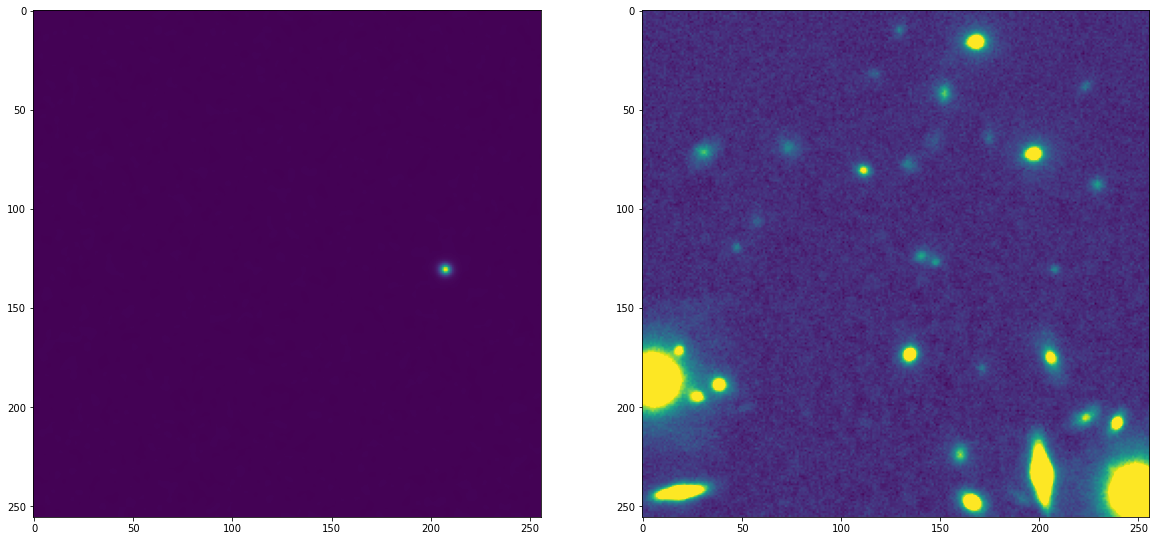

In [40]:
fig, ax = plt.subplots(1,2, figsize =(20,10))
ax[0].imshow(res[0][6])
ax[1].imshow(res[1][6], vmax = 10000)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


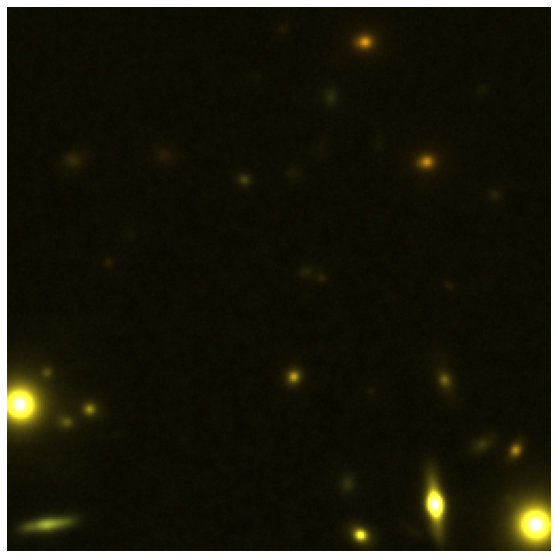

In [41]:
bands = [7,6,5] # Plot ugrizy

fig = plt.figure(figsize = (10,10))

plot.plot_rgb(res[1]/(np.max(res[1][4:])/10), bands = bands,ax= None, band_first = True,zoom = 1, clip = False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


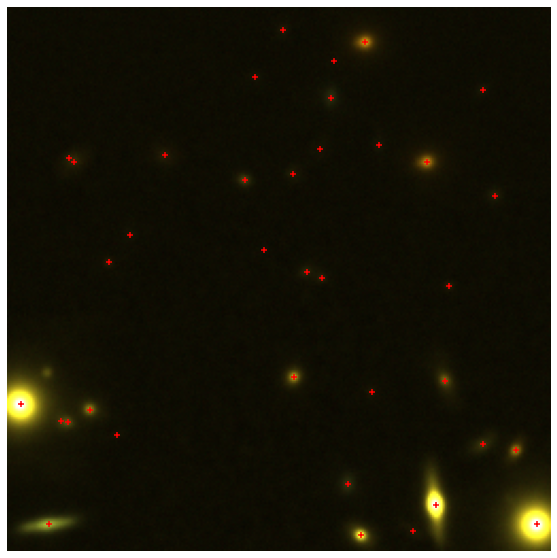

In [42]:
bands = [7,6,5] # Plot ugrizy
pixel_scale_lsst = 0.2 # arcsec/pix
fig = plt.figure(figsize = (10,10))

plot.plot_rgb(res[1]/(np.max(res[1][4:])/10), bands = bands,ax= None, band_first = True,zoom = 1, shifts = res[3]/pixel_scale_lsst, clip = False)